<a href="https://colab.research.google.com/github/Sanjana060101/ML-/blob/main/2_5_support_vector_regression_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

***We have a epsilon - insensitie tube here , a line in between with distances of epsilon from the boundary , distance of points(which are inside this tube) from the middle line won't be considered as an error , the distance of points (outside the tube) from the tube is the error we want to minimize***

---


***We have to apply feature scaling here as we don't have any direct or implicit equation btwn the dependent variable and features here , thus we don't have coefficients too who can compensate for small features***

---

***SVR model neglects the much smaller values in front of the large values***


---
***As in the target variable collumn also , the values are of much different scale as compared to features , 10,00000 in y and level 10 , very much difference , it will neglect the feature , hence need to apply feature scaling on the target variable also***


---
***If we have a point that it outside or far away from most of the points , an outlier , then SVR won't catch it***






#Linear SVR

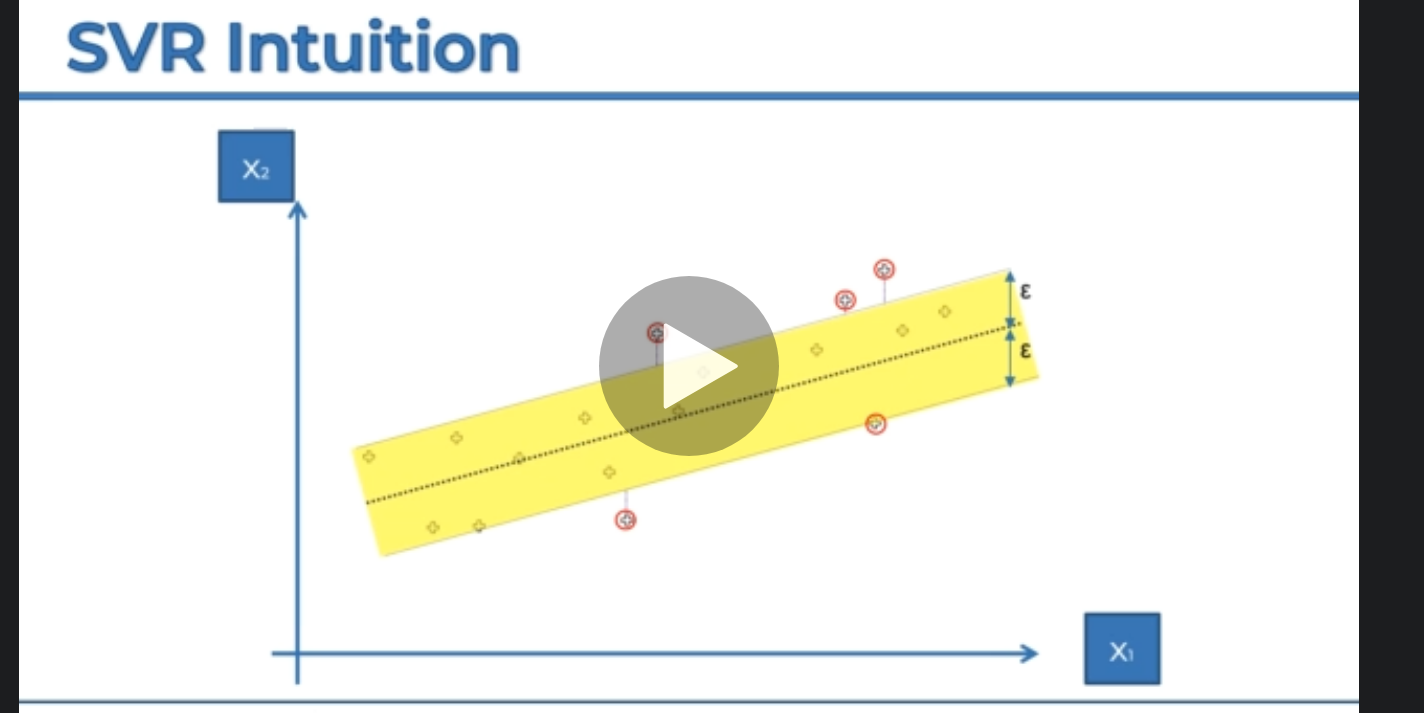

---

#Non-linear SVR(Gaussian RBF kernel that we're using ) 

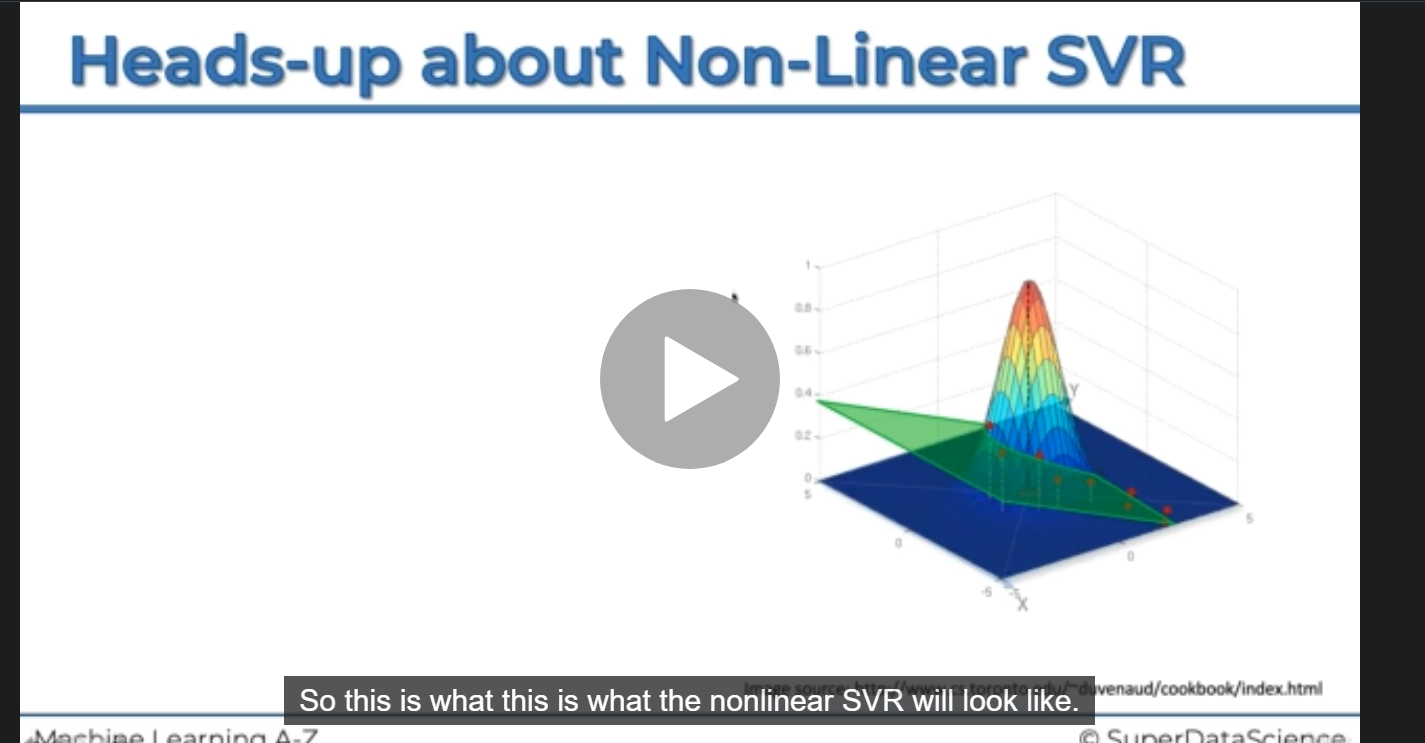

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X) #X is 2d

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y) #y is 1d

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y =  y.reshape(len(y),1)
# first arguement = no. of rows we want to give it , second arguement = no.of columns
# Standard Scaler class expects a 2d array as an input , that's why we have to covert
# y into a 2d array

In [ ]:
y # Now y is a 2d array 

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)  # X is scaled now

# We won't use the same standard scaler object on both the matrix of features X and y
# because , when we fit our object sc on X , it computes the mean and standard
# deviation of that same variable 

# hence we need to make two standard scaler objects , one to compute the mean for position levels
# and one to compute the mean of salaries 

sc_y = StandardScaler()
y = sc_y.fit_transform(y)   # y is scaled now

# Standaridation transforms values from -3 to +3 

In [ ]:
print(X)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # name of the param = kernel , value for parameter = 'rbf 
# parameters = kernels , that can either learn some linear relationships , that is linear kernel
# or that can learn some non-inear relaionships such as RBF radia basis

regressor.fit(X , y)    # model is trained   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))  # we have to scale this value according to the scales of our feature matrix , as on this we'll get predictions just like X 
# this wil return the predicted results in the scales we made for y , that's why we need to inverse scale the results predicted by this 
# By using inverse transform method to go back to the original scale of the predicted salary
# we took the entire predicted salary(scaled) as a parameter in the inverse_transform method 


array([170370.0204065])

## Visualising the SVR results

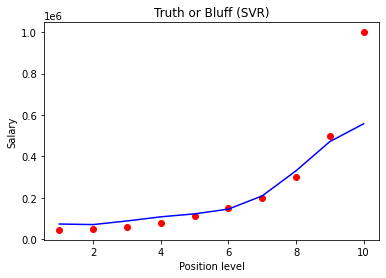

In [ ]:

y_pred_scaled = regressor.predict(X)  # X is also scaled here , and result is also scaled as regressor object was fitted with scaled parameters 
y_pred = sc_y.inverse_transform(y_pred_scaled)  # now y is not scaled 


plt.scatter(sc_x.inverse_transform(X) , sc_y.inverse_transform(y) , color = 'red')  # original x , y needs to be plotted which were scaled , need to inverse it 
plt.plot(sc_x.inverse_transform(X), y_pred , color = 'blue')  # need to plot X with the predicted results , plotting X needs inverse scaling of X , to predict result , 
# model needs scaled X as input , and the result returned by the model needs to be inverse scaled as we need to plot it 
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



## Visualising the SVR results (for higher resolution and smoother curve)

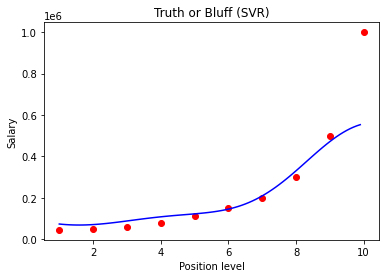

In [ ]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()